In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/memo.csv', encoding='unicode_escape', header=0)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-memo.csv', index=False)
test.to_csv('test-memo.csv', index=False)

In [5]:
train_df = pd.read_csv("train-memo.csv", encoding='unicode_escape', header=0)

In [6]:
train_df

,sentiment,review
0,1,We can use the gym whenever but the equipment ...
1,1,"The waiter was friendly, but the lobby was not..."
2,2,"The view of the hotel is good, and the rooms a..."
3,1,The lemon poppy-seed pancakes were always incl...
4,2,The sitting room is not modern and has no view...
...,...,...
13565,0,My husband and I stayed at The Chatwal for 9 n...
13566,1,As a hotel designer and someone who is not ver...
13567,2,"The hotel was pleasant, and the hotel style wa..."
13568,1,"There weren't any special programs for kids, b..."


In [7]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_27756\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


'We can use the gym whenever but the equipment is not not good.'

In [8]:
test_df = pd.read_csv("test-memo.csv", encoding='unicode_escape', header=0)

In [9]:
test_df.shape

(1508, 2)

In [10]:
test_df.head()

,sentiment,review
0,2,"The doorman was quite fast, although the wi-fi..."
1,2,"The living room was normal, and the room style..."
2,1,"The beef was so delicious, but the wine was so..."
3,2,"The food service was not incredible, but the s..."
4,1,"The grilled dishes were delicious, but the gra..."


In [11]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)

train_df.head(30)

,sentiment,review
0,1,We can use the gym whenever but the equipment ...
1,1,"The waiter was friendly, but the lobby was not..."
2,2,"The view of the hotel is good, and the rooms a..."
3,1,The lemon poppy-seed pancakes were always incl...
4,2,The sitting room is not modern and has no view...
5,2,"In the morning, it was full of coffee but no g..."
6,2,"There is a good decor style style, and the ele..."
7,1,"We have a bedroom and a tiny bathroom, but the..."
8,1,Although I did not love that there was not a m...
9,2,Just had four wonderful nights at this hotel; ...


In [12]:
test_df.head()

,sentiment,review
0,2,"The doorman was quite fast, although the wi-fi..."
1,2,"The living room was normal, and the room style..."
2,1,"The beef was so delicious, but the wine was so..."
3,2,"The food service was not incredible, but the s..."
4,1,"The grilled dishes were delicious, but the gra..."


In [13]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,We can use the gym whenever but the equipment ...
1,1,1,"The waiter was friendly, but the lobby was not..."
2,2,2,"The view of the hotel is good, and the rooms a..."
3,3,1,The lemon poppy-seed pancakes were always incl...
4,4,2,The sitting room is not modern and has no view...


In [14]:
train_df_bert

,id,label,sentence
0,0,1,We can use the gym whenever but the equipment ...
1,1,1,"The waiter was friendly, but the lobby was not..."
2,2,2,"The view of the hotel is good, and the rooms a..."
3,3,1,The lemon poppy-seed pancakes were always incl...
4,4,2,The sitting room is not modern and has no view...
...,...,...,...
13565,13565,0,My husband and I stayed at The Chatwal for 9 n...
13566,13566,1,As a hotel designer and someone who is not ver...
13567,13567,2,"The hotel was pleasant, and the hotel style wa..."
13568,13568,1,"There weren't any special programs for kids, b..."


In [15]:
train_df_bert = train_df_bert.iloc[0:10000]

In [16]:
train_df_bert

,id,label,sentence
0,0,1,We can use the gym whenever but the equipment ...
1,1,1,"The waiter was friendly, but the lobby was not..."
2,2,2,"The view of the hotel is good, and the rooms a..."
3,3,1,The lemon poppy-seed pancakes were always incl...
4,4,2,The sitting room is not modern and has no view...
...,...,...,...
9995,9995,2,"Superb service, pizza (but the drink price is ..."
9996,9996,2,"A fantastic staff, and special thanks to the m..."
9997,9997,2,"Also, the fridge is not quite big but has no s..."
9998,9998,1,"The bed was very comfortable, although the bat..."


In [17]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,2,"The doorman was quite fast, although the wi-fi..."
1,1,2,"The living room was normal, and the room style..."
2,2,1,"The beef was so delicious, but the wine was so..."
3,3,2,"The food service was not incredible, but the s..."
4,4,1,"The grilled dishes were delicious, but the gra..."


In [18]:
test_df_bert = test_df_bert.iloc[0:3000]

In [19]:
test_df_bert

,id,label,sentence
0,0,2,"The doorman was quite fast, although the wi-fi..."
1,1,2,"The living room was normal, and the room style..."
2,2,1,"The beef was so delicious, but the wine was so..."
3,3,2,"The food service was not incredible, but the s..."
4,4,1,"The grilled dishes were delicious, but the gra..."
...,...,...,...
1503,1503,2,"The reservation manager was quite fast, althou..."
1504,1504,0,"The supermarket is not great, and we get sweet..."
1505,1505,1,"I also loved the overall design of the hotel, ..."
1506,1506,2,The mini bar on the ground floor has great wit...


In [20]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [21]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [23]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  The waiter was friendly, but the lobby was not significant.
Tokenized:  ['the', 'waiter', 'was', 'friendly', ',', 'but', 'the', 'lobby', 'was', 'not', 'significant', '.']
Token IDs:  [1996, 15610, 2001, 5379, 1010, 2021, 1996, 9568, 2001, 2025, 3278, 1012]


In [24]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  60


In [25]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  60


In [26]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 200,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  We can use the gym whenever but the equipment is not not good.
Token IDs: tensor([ 101, 2057, 2064, 2224, 1996, 9726, 7188, 2021, 1996, 3941, 2003, 2025,
        2025, 2204, 1012,  102,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    

In [27]:

train_df_bert.head()

,id,label,sentence
0,0,1,We can use the gym whenever but the equipment ...
1,1,1,"The waiter was friendly, but the lobby was not..."
2,2,2,"The view of the hotel is good, and the rooms a..."
3,3,1,The lemon poppy-seed pancakes were always incl...
4,4,2,The sitting room is not modern and has no view...


In [28]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [30]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (1508, 60)


In [31]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [70]:
#FuzzyCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 3
#input_shape=x_train.shape
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60)                15120     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60)                0         
_________________________________________________________________
fuzzy_layer_3 (FuzzyLayer)   (None, 20)                2400      
_________________________________________________________________
dropout_17 (Dropout)         (None, 20)                0         
_________________________________________________________________
defuzzy_layer_3 (DefuzzyLaye (None, 10)                200       
_________________________________________________________________
dropout_18 (Dropout)         (None, 10)

In [71]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))

Epoch 1/20
900/900 [==============================] - 32s 31ms/step - loss: 0.7030 - accuracy: 0.6160 - val_loss: 0.4820 - val_accuracy: 0.6940
Epoch 2/20
900/900 [==============================] - 27s 30ms/step - loss: 0.4296 - accuracy: 0.7301 - val_loss: 0.4488 - val_accuracy: 0.7000
Epoch 3/20
900/900 [==============================] - 27s 30ms/step - loss: 0.3685 - accuracy: 0.8203 - val_loss: 0.3169 - val_accuracy: 0.8580
Epoch 4/20
900/900 [==============================] - 27s 30ms/step - loss: 0.2541 - accuracy: 0.8920 - val_loss: 0.2270 - val_accuracy: 0.8880
Epoch 5/20
900/900 [==============================] - 27s 30ms/step - loss: 0.2022 - accuracy: 0.9114 - val_loss: 0.1774 - val_accuracy: 0.9210
Epoch 6/20
900/900 [==============================] - 27s 30ms/step - loss: 0.1582 - accuracy: 0.9248 - val_loss: 0.1404 - val_accuracy: 0.9230
Epoch 7/20
900/900 [==============================] - 27s 30ms/step - loss: 0.1298 - accuracy: 0.9361 - val_loss: 0.1262 - val_accuracy:

In [48]:
#FuzzyCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 3
#input_shape=x_train.shape
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
#model.add(Dense(3, activation='softmax'))
model.add(Dense(1))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 60, 32)            5152      
_________________________________________________________________
dropout_45 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 60, 32)            4128      
_________________________________________________________________
dropout_46 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 60, 32)            3104      
_________________________________________________________________
dropout_47 (Dropout)         (None, 60,

In [49]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20


ValueError: in user code:

    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py:1738 sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\keras\backend.py:4956 sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_ops.py:4351 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\huyen\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_ops.py:4256 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (10, 1)) should equal the shape of logits except for the last dimension (received (10, 60, 3)).


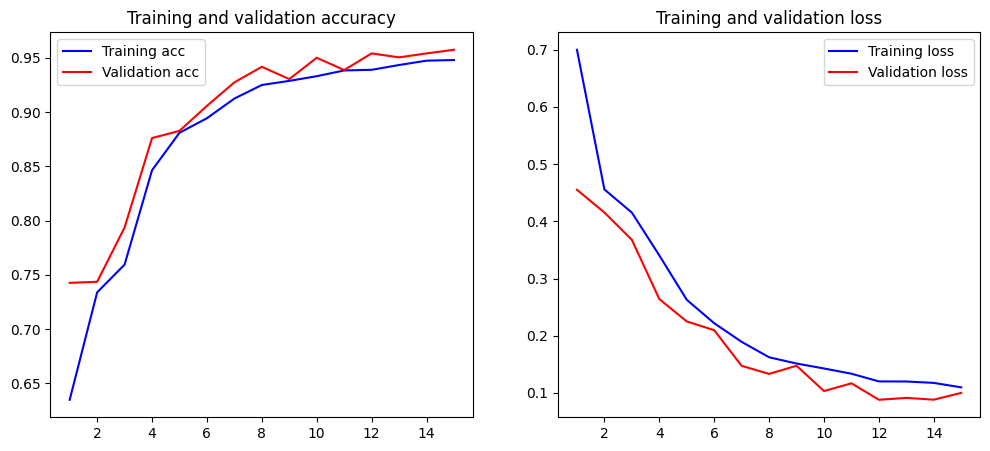

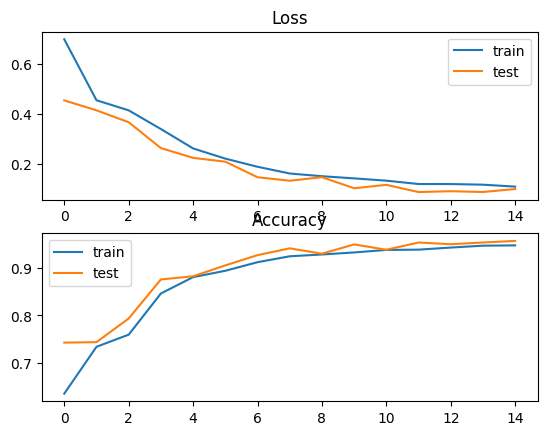

In [129]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [152]:
#NewCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 5000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 125
nb_classes = 3

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
#model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(FuzzyLayer(20, input_dim=2))
#model.add(DefuzzyLayer(1))

#model.add(Conv1D(filters,kernel_size,padding='same',activation='relu',strides=3))

#model.add(FuzzyLayer(10, input_dim=2))
#model.add(DefuzzyLayer(1))

#model.add(Conv1D(filters,kernel_size,padding='same',activation='relu',strides=1))

#model.add(FuzzyLayer(10, input_dim=2))
model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
#model.add(FuzzyLayer(10, input_dim=2))

#model.add(Flatten())
#model.add(Dense(hidden_dims))
#model.add(Dropout(0.2))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(DefuzzyLayer(1))

#model.add(Dense(nb_classes))
#model.add(Activation('softmax'))
#model.add(Dense(1, activation='sigmoid'))
#model.add(DefuzzyLayer(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 32)            160000    
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 60, 32)            5152      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 60, 32)            4128      
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 60, 32)            3104      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 30, 32)            0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 60)                15120     
_________________________________________________________________
dense_10 (Dense)             (None, 1)

In [149]:
# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Epoch 1/50
1000/1000 [==============================] - 16s 13ms/step - loss: 0.3485 - accuracy: 0.8528 - val_loss: 0.2182 - val_accuracy: 0.9203
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1685 - accuracy: 0.9306 - val_loss: 0.1174 - val_accuracy: 0.9537
Epoch 3/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1220 - accuracy: 0.9467 - val_loss: 0.0877 - val_accuracy: 0.9590
Epoch 4/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0891 - accuracy: 0.9591 - val_loss: 0.0747 - val_accuracy: 0.9643
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0699 - accuracy: 0.9636 - val_loss: 0.0562 - val_accuracy: 0.9683
Epoch 6/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0682 - accuracy: 0.9638 - val_loss: 0.0522 - val_accuracy: 0.9713
Epoch 7/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0584 - accuracy: 0.9657 - val_loss: 0.0529 -

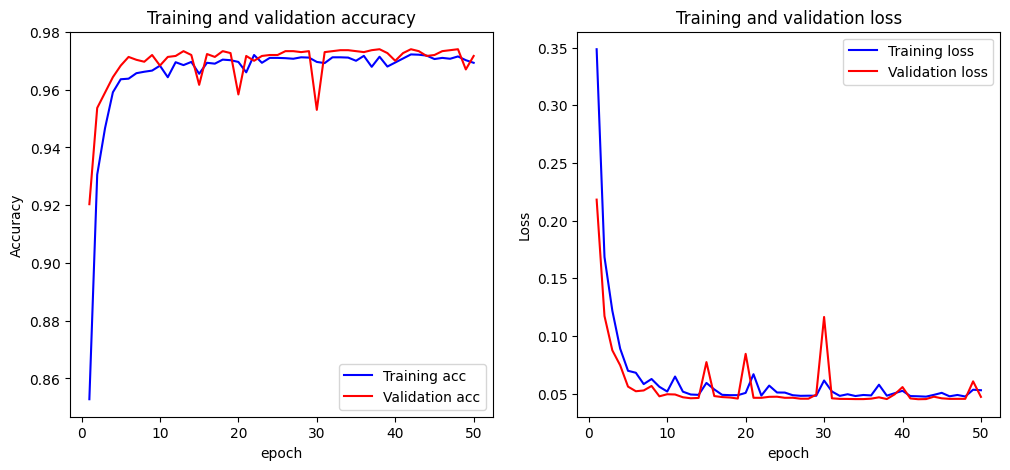

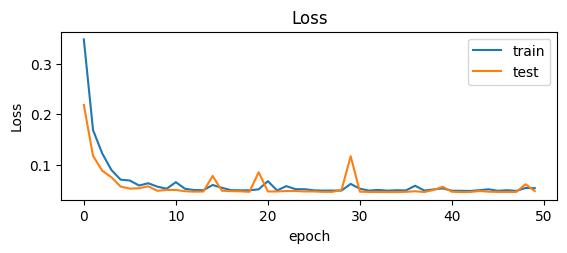

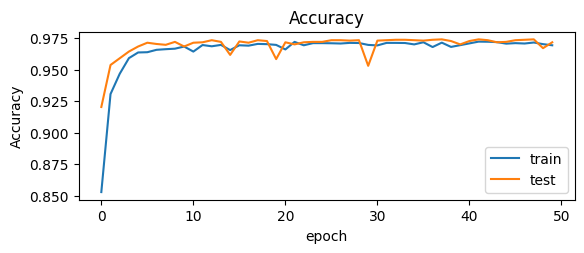

In [150]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [177]:
# 3 - CNNLSTM model design
print('Building model')

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
#model.add(FuzzyLayer(5, input_dim=2))
#model.add(DefuzzyLayer(1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Building model


ValueError: Input 0 of layer conv1d_67 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 125)

In [77]:
history1 = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Epoch 1/20
1000/1000 [==============================] - 9s 7ms/step - loss: 0.3485 - accuracy: 0.8524 - val_loss: 0.1909 - val_accuracy: 0.9187
Epoch 2/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1571 - accuracy: 0.9321 - val_loss: 0.1119 - val_accuracy: 0.9503
Epoch 3/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0945 - accuracy: 0.9574 - val_loss: 0.0744 - val_accuracy: 0.9627
Epoch 4/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0833 - accuracy: 0.9585 - val_loss: 0.0713 - val_accuracy: 0.9633
Epoch 5/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0700 - accuracy: 0.9617 - val_loss: 0.0696 - val_accuracy: 0.9660
Epoch 6/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0678 - accuracy: 0.9654 - val_loss: 0.0538 - val_accuracy: 0.9707
Epoch 7/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0743 - accuracy: 0.9608 - val_loss: 0.0663 - val_accuracy:

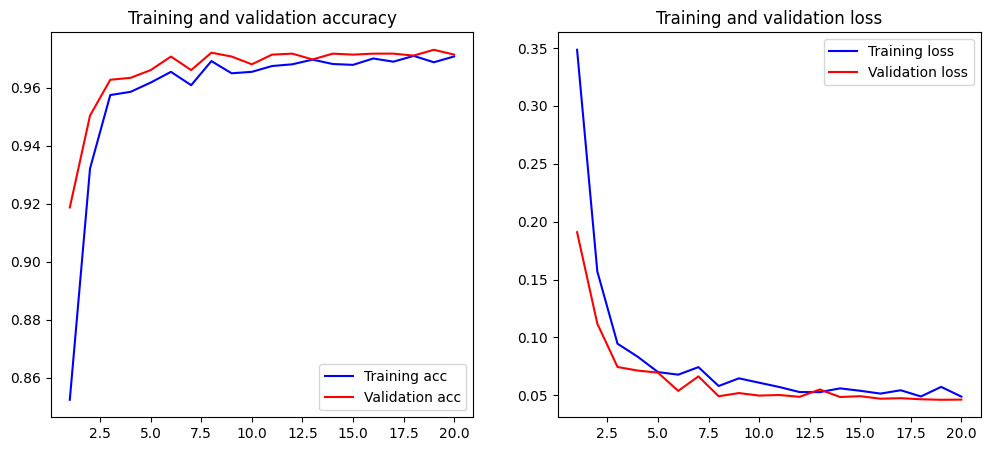

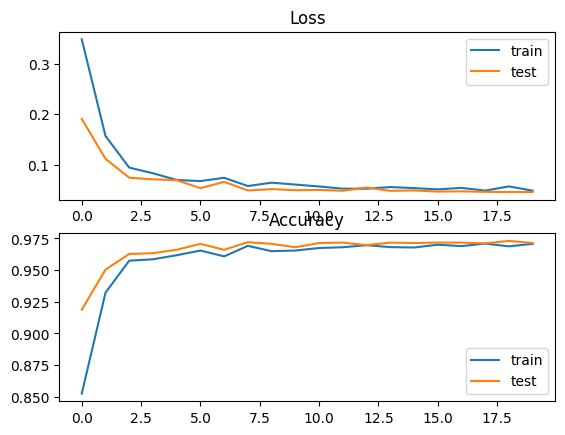

In [78]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [227]:
# number of neurons as number of Rule will be produce
n_neurons = 100

# number of features feed to fuzzy Inference Layer
n_feature = 9
from itertools import product
from keras import backend as K
import random
# to get all permutaion
fRules = list(product([-1.0,0.0,1.0], repeat=n_feature)) 

# based on article just 100 of them are needed
out_fRules = random.sample(fRules, n_neurons)

fRules_sigma = K.transpose(out_fRules)

In [228]:
import tensorflow as tf
class fuzzy_inference_block(tf.keras.layers.Layer):
    def __init__(self, output_dim, i_fmap, mu, sigma):

        self.output_dim = output_dim
        self.index = i_fmap
        self.mu = mu
        self.sigma = sigma

        super(fuzzy_inference_block, self).__init__()

    def build(self, input_shape):
        self.mu_map = fRules_sigma * self.mu
        self.sigma_map = tf.ones((n_feature, self.output_dim)) * self.sigma
        

        super().build(input_shape)

    def call(self, inputs):
        fMap = inputs[:,n_feature*(self.index):n_feature*(self.index+1)]
        # create variables for processing
        aligned_x = K.repeat_elements(K.expand_dims(fMap, axis=-1), self.output_dim, -1)
        aligned_c = self.mu_map
        aligned_s = self.sigma_map


        # calculate output of each neuron (fuzzy rule)
        phi = K.exp(-K.sum(K.square(aligned_x - aligned_c) / (2 * K.square(aligned_s)),
                           axis=-2, keepdims=False))
        return phi


In [239]:
#Bi-LSTM Network
from tqdm import tqdm
from keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

#model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
n_femap=4
stride=2
mu=3.0
sigma=1.2
embedding_vector_length = 32
max_features = 5000
main_input=Input(shape=(60,))
non_static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_vector_length,activation='tanh',
                             recurrent_activation='relu',
                             return_state=False,
                             return_sequences=False))(two_channel)


fMaps = Flatten()(bi_lstm)
drop_out=Dropout(0.3)(fMaps)
fuzzy_inference = []
for i in tqdm(range(n_femap)):
    f_block = fuzzy_inference_block(output_dim=n_neurons, i_fmap=i, mu=mu, sigma=sigma)(drop_out)
    fuzzy_inference.append(f_block)
merged = concatenate(fuzzy_inference, axis=1)

dc=Dense(1,activation='sigmoid')(merged)

model=Model(inputs=main_input,outputs=dc)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#sparse_categorical_crossentropy,

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.50it/s]

Bi-LSTM NetWork
Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_46 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 embedding_95 (Embedding)       (None, 60, 32)       160000      ['input_46[0][0]']               
                                                                                                  
 embedding_96 (Embedding)       (None, 60, 32)       160000      ['input_46[0][0]']               
                                                                                                  
 dropout_125 (Dropout)          (None, 60, 32)       0           ['embedding_95[0][0]']           
                                                                           

In [240]:
#Excute Bi-LSTM Model
epoch_cnt=20

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
313/313 [==============================] - 9s 19ms/step - loss: 0.0000e+00 - accuracy: 0.6497 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 3/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 4/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accura

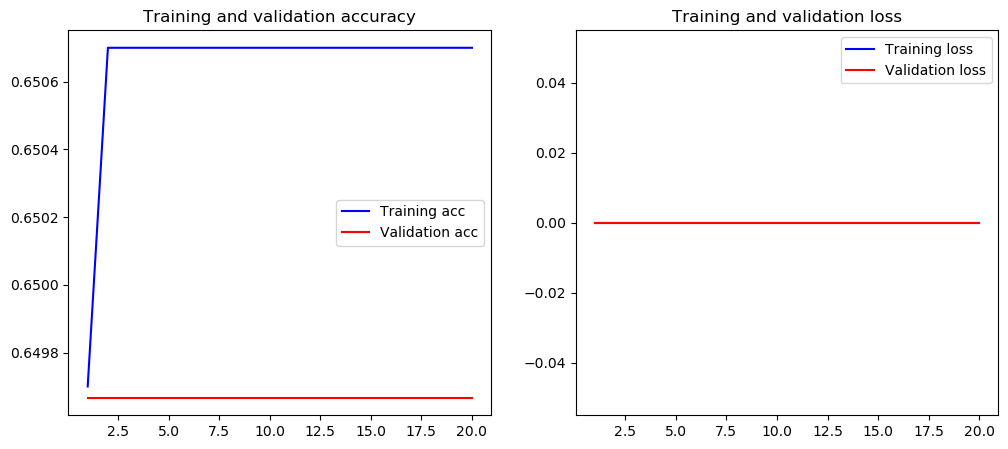

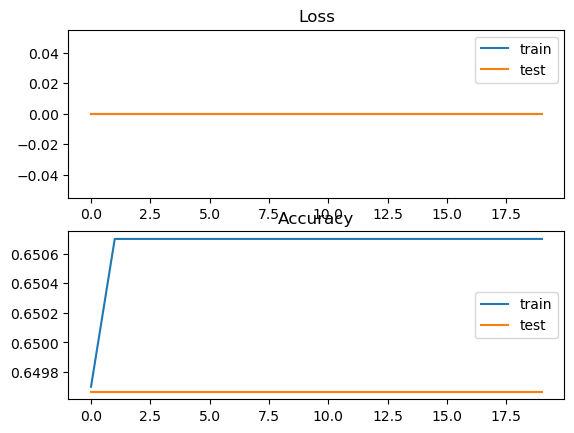

In [242]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [253]:
#Bi-LSTM Network
from tqdm import tqdm
from keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

#model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
n_femap=4
stride=2
mu=3.0
sigma=1.2
embedding_vector_length = 32
max_features = 5000
main_input=Input(shape=(60,))
non_static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_vector_length,activation='tanh',
                             recurrent_activation='relu',
                             return_state=False,
                             return_sequences=False))(two_channel)

#fMaps = Flatten()(bi_lstm)
drop_out=Dropout(0.3)(bi_lstm)

dc=Dense(1,activation='sigmoid')(drop_out)

model=Model(inputs=main_input,outputs=dc)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#sparse_categorical_crossentropy,

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)

Bi-LSTM NetWork
Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_53 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 embedding_108 (Embedding)      (None, 60, 32)       160000      ['input_53[0][0]']               
                                                                                                  
 embedding_109 (Embedding)      (None, 60, 32)       160000      ['input_53[0][0]']               
                                                                                                  
 dropout_143 (Dropout)          (None, 60, 32)       0           ['embedding_108[0][0]']          
                                                                           

In [254]:
#Excute Bi-LSTM Model
epoch_cnt=20

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
313/313 [==============================] - 8s 18ms/step - loss: nan - accuracy: 0.6508 - val_loss: nan - val_accuracy: 0.6497
Epoch 2/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 3/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 6/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 7/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 8/20
313/313 [=====================

In [ ]:
from utils import *
import numpy as np
import random as rn
import tensorflow as tf
np.random.seed(42)
rn.seed(554521)
tf.set_random_seed(14452)
from keras.models import Model
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Dropout, Activation, Input, Average
from keras.models import load_model
from sklearn.metrics import classification_report
import matplotlib as plt

RUN_ENSAMBLE = True
MODEL_SAVE_FOLDER = "models"

def model_1():
    model = Sequential(name="MODEL1")
    model.add(Dense(18, activation = 'sigmoid', input_shape=(28,)))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation = 'sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['mae','acc'])
    return model

def model_2(input:int, output: int):
    input = Input(shape=(input,))
    x = Dense(27, activation = 'relu')(input)
    #x = Dense(7, activation = 'sigmoid')(x)
    x = Dropout(0.1)(x)
    output = Dense(output, activation = 'softmax')(x)
    model = Model(inputs=input, outputs=output, name="MODEL2")

    return model

def model_3(input:int, output: int):
    input = Input(shape=(input,))
    x = Dense(35, activation = 'tanh')(input)
    #x = Dense(10, activation = 'tanh')(x)
    x = Dropout(0.2)(x)
    output = Dense(output, activation = 'softmax')(x)

    model = Model(inputs=input, outputs=output, name="MODEL3")

    return model


def ensamble_model(input: int):
    models = get_models(MODEL_SAVE_FOLDER) 
    models = load_models(models)
    input = Input(shape=(input,))
    eModels =[model(input) for model in models] 
    averageLayer = Average()(eModels)   
    ensModel = Model (name="EnsambleModel", inputs=input, outputs=averageLayer) 

    return ensModel

if __name__ == "__main__":
    trainX,x_test, trainY, y_test = prepare_data('dwt.csv')
    output = len(np.unique(y_test))
    cv_trainX, cv_trainY = get_data_without_encoding('dwt.csv')
    # model_1 = model_1(trainX.shape[1], output)
    train_with_cross_validation(model_1,trainX, trainY,epochs=2)
    import pdb; pdb.set_trace()
    # model_1 = fit_model(model_1, trainX,trainY,epochs=2, k_fold=3)
    
    # model_2 = model_2(trainX.shape[1], output)
    # model_2 = fit_model(model_2, trainX,trainY, epochs=2,k_fold=3)
   
    # model_3 = model_3(trainX.shape[1], output)
    # model_3 = fit_model(model_3, trainX,trainY, epochs=2, k_fold=3)
   
    # print(evalute_model(model_1,trainX, trainY,RUN_ENSAMBLE))
    # print(evalute_model(model_1, x_test, y_test, RUN_ENSAMBLE))
    # T=model_1.predict(x_test)
    # pred = np.argmax(T, axis=1)
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))

    # print(evalute_model(model_2, x_test, y_test, RUN_ENSAMBLE))
    # # print(evalute_model(model_2,trainX, trainY,RUN_ENSAMBLE))
    # T=model_2.predict(x_test)
    # pred = np.argmax(T, axis=1)
   
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))

    # print(evalute_model(model_3, x_test, y_test, RUN_ENSAMBLE))
    # print(evalute_model(model_3,trainX, trainY,RUN_ENSAMBLE))
    # T=model_3.predict(x_test)
    # pred = np.argmax(T, axis=1)
    
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))
    

    save_model(model_1, path=MODEL_SAVE_FOLDER, filename=model_1.name)
    # # save_model(model_2, path=MODEL_SAVE_FOLDER, filename=model_2.name)
    # # save_model(model_3, path=MODEL_SAVE_FOLDER, filename=model_3.name)
    
    # RUN_ENSAMBLE = True
    # if(RUN_ENSAMBLE ==True):
    #     print("Running ensamble model")
    #     ensamble = ensamble_model(trainX.shape[1])
    #     ensamble.summary()
    #     print(evalute_model(ensamble, x_test, y_test, RUN_ENSAMBLE))
    #     pred=ensamble.predict(x_test)
    #     pred = np.argmax(pred, axis=1)
    #     Y_test = np.argmax(y_test, axis=1)
    #     cm =  confusion_matrix(Y_test, pred)
    #     np.set_printoptions(precision=2)
    #     print ("Confusion Matrix")
    #     print (cm)
    #     print(classification_report(Y_test, pred))